In [1]:
import pandas as pd
import seaborn as srn
import numpy as np
from matplotlib import pyplot as plt
import statistics

In [2]:
data = pd.read_excel('C:\\Users\\Riallen\\Documents\\Print_de_telas\\data2\\data_geral.xlsx')
data.head()

,Odds,Qt_Apostadores,Time_Odds,Data_Hora_Aposta,Date_Aposta,Hora_Aposta,hour
0,1.01,1976,Mon Feb 13 09:34:18 2023,2023-02-13 09:34:18,2023-02-13,09:34:18,9
1,1.83,1930,Mon Feb 13 09:34:36 2023,2023-02-13 09:34:36,2023-02-13,09:34:36,9
2,4.48,2073,Mon Feb 13 09:35:07 2023,2023-02-13 09:35:07,2023-02-13,09:35:07,9
3,6.58,2104,Mon Feb 13 09:35:42 2023,2023-02-13 09:35:42,2023-02-13,09:35:42,9
4,1.53,2065,Mon Feb 13 09:36:01 2023,2023-02-13 09:36:01,2023-02-13,09:36:01,9


In [3]:
data['Odds'].describe()

count    3308.000000
mean        9.271333
std        91.754512
min         1.000000
25%         1.290000
50%         1.960000
75%         3.937500
max      4339.900000
Name: Odds, dtype: float64

In [4]:
data['Qt_Apostadores'].describe()

count    3308.000000
mean     2100.227932
std      1009.730459
min        42.000000
25%      1435.000000
50%      2074.000000
75%      2787.000000
max      5180.000000
Name: Qt_Apostadores, dtype: float64

In [5]:
data['hour'].describe()

count    3308.000000
mean       10.901149
std         6.877314
min         0.000000
25%         5.000000
50%        11.000000
75%        17.000000
max        23.000000
Name: hour, dtype: float64

Text(0.5, 1.0, 'Odds')

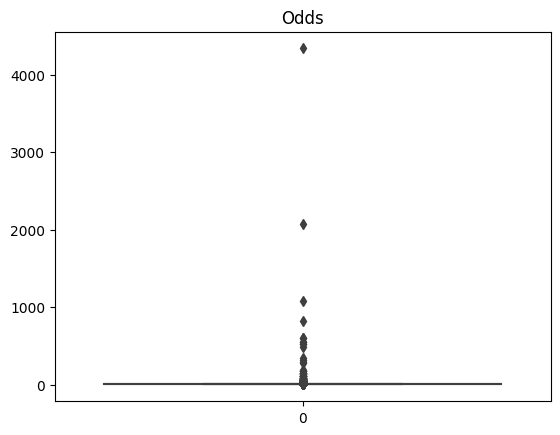

In [6]:
srn.boxplot(data['Odds']).set_title('Odds')

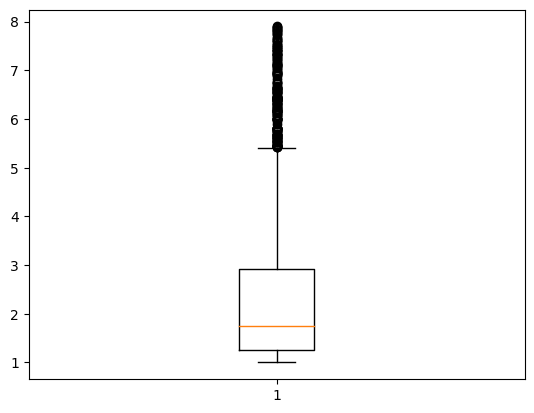

In [7]:
data_box_plot = np.array(data['Odds'])
q1 = np.percentile(data_box_plot, 25)
q3 = np.percentile(data_box_plot, 75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
data_sem_outliers = [x for x in data_box_plot if x > lower_bound and x < upper_bound]

# Plotar o boxplot sem outliers
plt.boxplot(data_sem_outliers)
plt.show()

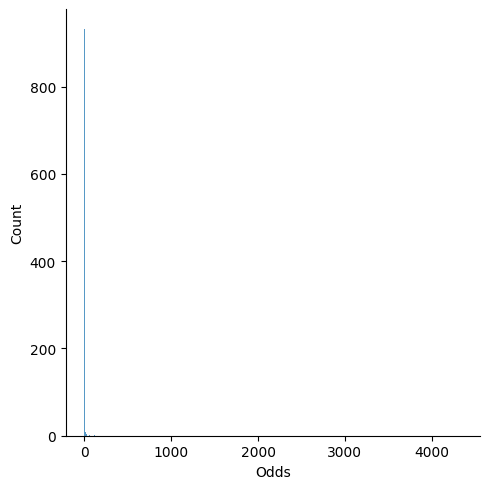

In [8]:
srn.displot(data['Odds'])

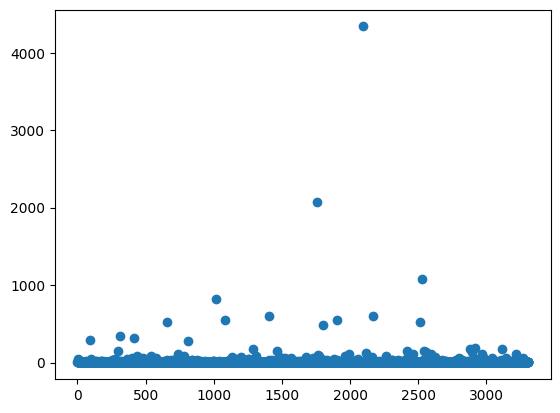

In [9]:
x = np.array(range(0,3308,1))
y = np.array(data['Odds'])
plt.scatter(x,y)

In [10]:
moda = statistics.mode(y)
moda

1.0

In [11]:
data['Odds'].value_counts()

1.00      118
1.01       36
1.07       35
1.05       34
1.06       34
         ... 
336.49      1
4.60        1
8.38        1
3.88        1
11.52       1
Name: Odds, Length: 888, dtype: int64

In [17]:
data[data["Odds"] == 1.00]

,Odds,Qt_Apostadores,Time_Odds,Data_Hora_Aposta,Date_Aposta,Hora_Aposta,hour
16,1.0,2117,Mon Feb 13 09:41:21 2023,2023-02-13 09:41:21,2023-02-13,09:41:21,9
141,1.0,1600,Mon Feb 13 10:30:52 2023,2023-02-13 10:30:52,2023-02-13,10:30:52,10
165,1.0,1824,Mon Feb 13 10:40:22 2023,2023-02-13 10:40:22,2023-02-13,10:40:22,10
189,1.0,1953,Mon Feb 13 10:49:37 2023,2023-02-13 10:49:37,2023-02-13,10:49:37,10
203,1.0,2536,Mon Feb 13 10:55:31 2023,2023-02-13 10:55:31,2023-02-13,10:55:31,10
...,...,...,...,...,...,...,...
3176,1.0,1725,Tue Feb 14 08:36:12 2023,2023-02-14 08:36:12,2023-02-14,08:36:12,8
3219,1.0,2110,Tue Feb 14 08:54:32 2023,2023-02-14 08:54:32,2023-02-14,08:54:32,8
3250,1.0,2549,Tue Feb 14 09:07:26 2023,2023-02-14 09:07:26,2023-02-14,09:07:26,9
3259,1.0,1995,Tue Feb 14 09:10:51 2023,2023-02-14 09:10:51,2023-02-14,09:10:51,9


In [18]:
118/len(data['Odds'])

0.035671100362756954

In [19]:
data[data["Odds"] <= 1.61] 

,Odds,Qt_Apostadores,Time_Odds,Data_Hora_Aposta,Date_Aposta,Hora_Aposta,hour
0,1.01,1976,Mon Feb 13 09:34:18 2023,2023-02-13 09:34:18,2023-02-13,09:34:18,9
4,1.53,2065,Mon Feb 13 09:36:01 2023,2023-02-13 09:36:01,2023-02-13,09:36:01,9
5,1.25,1740,Mon Feb 13 09:36:16 2023,2023-02-13 09:36:16,2023-02-13,09:36:16,9
7,1.60,2502,Mon Feb 13 09:36:59 2023,2023-02-13 09:36:59,2023-02-13,09:36:59,9
11,1.03,1778,Mon Feb 13 09:39:33 2023,2023-02-13 09:39:33,2023-02-13,09:39:33,9
...,...,...,...,...,...,...,...
3299,1.36,2194,Tue Feb 14 09:27:28 2023,2023-02-14 09:27:28,2023-02-14,09:27:28,9
3302,1.27,2207,Tue Feb 14 09:28:26 2023,2023-02-14 09:28:26,2023-02-14,09:28:26,9
3304,1.22,2137,Tue Feb 14 09:29:04 2023,2023-02-14 09:29:04,2023-02-14,09:29:04,9
3305,1.01,1793,Tue Feb 14 09:29:19 2023,2023-02-14 09:29:19,2023-02-14,09:29:19,9


In [20]:
1295/len(data['Odds'])

0.3914752116082225

In [21]:
data[data["Odds"] <= 1.40] 

,Odds,Qt_Apostadores,Time_Odds,Data_Hora_Aposta,Date_Aposta,Hora_Aposta,hour
0,1.01,1976,Mon Feb 13 09:34:18 2023,2023-02-13 09:34:18,2023-02-13,09:34:18,9
5,1.25,1740,Mon Feb 13 09:36:16 2023,2023-02-13 09:36:16,2023-02-13,09:36:16,9
11,1.03,1778,Mon Feb 13 09:39:33 2023,2023-02-13 09:39:33,2023-02-13,09:39:33,9
13,1.05,1885,Mon Feb 13 09:40:12 2023,2023-02-13 09:40:12,2023-02-13,09:40:12,9
16,1.00,2117,Mon Feb 13 09:41:21 2023,2023-02-13 09:41:21,2023-02-13,09:41:21,9
...,...,...,...,...,...,...,...
3299,1.36,2194,Tue Feb 14 09:27:28 2023,2023-02-14 09:27:28,2023-02-14,09:27:28,9
3302,1.27,2207,Tue Feb 14 09:28:26 2023,2023-02-14 09:28:26,2023-02-14,09:28:26,9
3304,1.22,2137,Tue Feb 14 09:29:04 2023,2023-02-14 09:29:04,2023-02-14,09:29:04,9
3305,1.01,1793,Tue Feb 14 09:29:19 2023,2023-02-14 09:29:19,2023-02-14,09:29:19,9


In [22]:
1023/len(data['Odds'])

0.3092503022974607

In [23]:
data[data["Odds"] <= 1.28]

,Odds,Qt_Apostadores,Time_Odds,Data_Hora_Aposta,Date_Aposta,Hora_Aposta,hour
0,1.01,1976,Mon Feb 13 09:34:18 2023,2023-02-13 09:34:18,2023-02-13,09:34:18,9
5,1.25,1740,Mon Feb 13 09:36:16 2023,2023-02-13 09:36:16,2023-02-13,09:36:16,9
11,1.03,1778,Mon Feb 13 09:39:33 2023,2023-02-13 09:39:33,2023-02-13,09:39:33,9
13,1.05,1885,Mon Feb 13 09:40:12 2023,2023-02-13 09:40:12,2023-02-13,09:40:12,9
16,1.00,2117,Mon Feb 13 09:41:21 2023,2023-02-13 09:41:21,2023-02-13,09:41:21,9
...,...,...,...,...,...,...,...
3293,1.27,2477,Tue Feb 14 09:24:53 2023,2023-02-14 09:24:53,2023-02-14,09:24:53,9
3302,1.27,2207,Tue Feb 14 09:28:26 2023,2023-02-14 09:28:26,2023-02-14,09:28:26,9
3304,1.22,2137,Tue Feb 14 09:29:04 2023,2023-02-14 09:29:04,2023-02-14,09:29:04,9
3305,1.01,1793,Tue Feb 14 09:29:19 2023,2023-02-14 09:29:19,2023-02-14,09:29:19,9


In [24]:
807/len(data['Odds'])

0.2439540507859734

In [25]:
data[data["Odds"] >= 2.5]

,Odds,Qt_Apostadores,Time_Odds,Data_Hora_Aposta,Date_Aposta,Hora_Aposta,hour
2,4.48,2073,Mon Feb 13 09:35:07 2023,2023-02-13 09:35:07,2023-02-13,09:35:07,9
3,6.58,2104,Mon Feb 13 09:35:42 2023,2023-02-13 09:35:42,2023-02-13,09:35:42,9
8,51.46,2199,Mon Feb 13 09:37:59 2023,2023-02-13 09:37:59,2023-02-13,09:37:59,9
9,28.16,2117,Mon Feb 13 09:38:52 2023,2023-02-13 09:38:52,2023-02-13,09:38:52,9
10,2.77,1978,Mon Feb 13 09:39:16 2023,2023-02-13 09:39:16,2023-02-13,09:39:16,9
...,...,...,...,...,...,...,...
3291,3.91,2288,Tue Feb 14 09:24:23 2023,2023-02-14 09:24:23,2023-02-14,09:24:23,9
3296,11.52,2185,Tue Feb 14 09:26:09 2023,2023-02-14 09:26:09,2023-02-14,09:26:09,9
3297,4.72,2334,Tue Feb 14 09:26:40 2023,2023-02-14 09:26:40,2023-02-14,09:26:40,9
3298,3.71,2324,Tue Feb 14 09:27:12 2023,2023-02-14 09:27:12,2023-02-14,09:27:12,9


In [26]:
1303/len(data['Odds'])

0.3938935912938331

In [27]:
data[data["Odds"] >= 3.83]

,Odds,Qt_Apostadores,Time_Odds,Data_Hora_Aposta,Date_Aposta,Hora_Aposta,hour
2,4.48,2073,Mon Feb 13 09:35:07 2023,2023-02-13 09:35:07,2023-02-13,09:35:07,9
3,6.58,2104,Mon Feb 13 09:35:42 2023,2023-02-13 09:35:42,2023-02-13,09:35:42,9
8,51.46,2199,Mon Feb 13 09:37:59 2023,2023-02-13 09:37:59,2023-02-13,09:37:59,9
9,28.16,2117,Mon Feb 13 09:38:52 2023,2023-02-13 09:38:52,2023-02-13,09:38:52,9
14,5.44,2074,Mon Feb 13 09:40:44 2023,2023-02-13 09:40:44,2023-02-13,09:40:44,9
...,...,...,...,...,...,...,...
3283,17.40,2190,Tue Feb 14 09:21:21 2023,2023-02-14 09:21:21,2023-02-14,09:21:21,9
3286,20.90,2014,Tue Feb 14 09:22:40 2023,2023-02-14 09:22:40,2023-02-14,09:22:40,9
3291,3.91,2288,Tue Feb 14 09:24:23 2023,2023-02-14 09:24:23,2023-02-14,09:24:23,9
3296,11.52,2185,Tue Feb 14 09:26:09 2023,2023-02-14 09:26:09,2023-02-14,09:26:09,9


In [28]:
850/len(data['Odds'])

0.2569528415961306

In [29]:
data['Qt_Apostadores'].describe()

count    3308.000000
mean     2100.227932
std      1009.730459
min        42.000000
25%      1435.000000
50%      2074.000000
75%      2787.000000
max      5180.000000
Name: Qt_Apostadores, dtype: float64

<BarContainer object of 3308 artists>

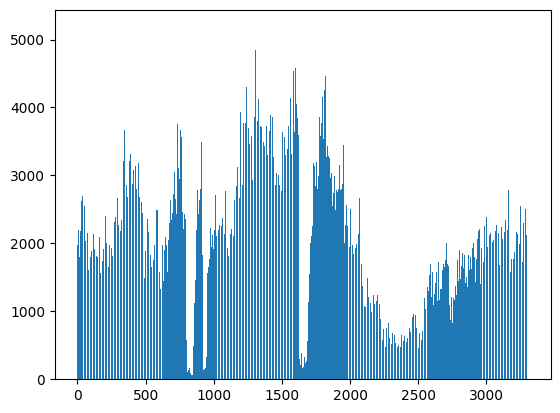

In [31]:
x = np.array(range(0,3308,1))
y = np.array(data['Qt_Apostadores'])
plt.bar(x,y)

In [32]:
i = 0
t = len(data['Hora_Aposta'])
#print(t)
segundo = []
minuto = []
for j in range(0,t):
    #print(data['Hora_Aposta'][j])
    #print(data['Hora_Aposta'][j].split(":"))
    x = data['Hora_Aposta'][j].split(":")
    segundo.append(float(x[2]))
    minuto.append(float(x[1]))

for j in range(0,t):
    segundo[j] = segundo[j]/60
    minuto[j] = minuto[j] + round(segundo[j],6)

for j in range(0,t):
    minuto[j] = round(minuto[j]/60, 6)

data['hour_edi'] = data['hour']
for j in range(0,t):
    data['hour_edi'][j] = data['hour_edi'][j] + minuto[j]

data['hour_edi']

C:\Users\Riallen\AppData\Local\Temp\ipykernel_8168\1362838707.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['hour_edi'][j] = data['hour_edi'][j] + minuto[j]


0        9.571667
1        9.576667
2        9.585278
3        9.595000
4        9.600278
          ...    
3303     9.479722
3304     9.484444
3305     9.488611
3306     9.495556
3307    12.813611
Name: hour_edi, Length: 3308, dtype: float64

In [33]:
data['hour_edi'].describe()

count    3308.000000
mean       11.405956
std         6.891906
min         0.001111
25%         5.428681
50%        11.017222
75%        17.204375
max        23.995556
Name: hour_edi, dtype: float64

In [34]:
data['hour']

0        9
1        9
2        9
3        9
4        9
        ..
3303     9
3304     9
3305     9
3306     9
3307    12
Name: hour, Length: 3308, dtype: int64

In [35]:
data_hora_145 = data[data['Odds']> 1.45]
data_hora_145

,Odds,Qt_Apostadores,Time_Odds,Data_Hora_Aposta,Date_Aposta,Hora_Aposta,hour,hour_edi
1,1.83,1930,Mon Feb 13 09:34:36 2023,2023-02-13 09:34:36,2023-02-13,09:34:36,9,9.576667
2,4.48,2073,Mon Feb 13 09:35:07 2023,2023-02-13 09:35:07,2023-02-13,09:35:07,9,9.585278
3,6.58,2104,Mon Feb 13 09:35:42 2023,2023-02-13 09:35:42,2023-02-13,09:35:42,9,9.595000
4,1.53,2065,Mon Feb 13 09:36:01 2023,2023-02-13 09:36:01,2023-02-13,09:36:01,9,9.600278
6,1.83,2138,Mon Feb 13 09:36:35 2023,2023-02-13 09:36:35,2023-02-13,09:36:35,9,9.609722
...,...,...,...,...,...,...,...,...
3298,3.71,2324,Tue Feb 14 09:27:12 2023,2023-02-14 09:27:12,2023-02-14,09:27:12,9,9.453333
3300,2.21,1760,Tue Feb 14 09:27:49 2023,2023-02-14 09:27:49,2023-02-14,09:27:49,9,9.463611
3301,1.78,2135,Tue Feb 14 09:28:11 2023,2023-02-14 09:28:11,2023-02-14,09:28:11,9,9.469722
3303,2.03,1922,Tue Feb 14 09:28:47 2023,2023-02-14 09:28:47,2023-02-14,09:28:47,9,9.479722


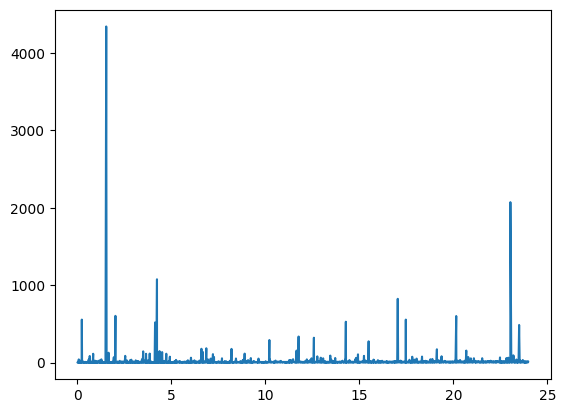

In [36]:
x = np.array(data_hora_145['hour_edi'])
y = np.array(data_hora_145['Odds'])

plt.plot(x,y)

In [40]:
dia_23_02 = data[data['Date_Aposta'] == '2023-02-13'] 
dia_23_02

,Odds,Qt_Apostadores,Time_Odds,Data_Hora_Aposta,Date_Aposta,Hora_Aposta,hour,hour_edi
0,1.01,1976,Mon Feb 13 09:34:18 2023,2023-02-13 09:34:18,2023-02-13,09:34:18,9,9.571667
1,1.83,1930,Mon Feb 13 09:34:36 2023,2023-02-13 09:34:36,2023-02-13,09:34:36,9,9.576667
2,4.48,2073,Mon Feb 13 09:35:07 2023,2023-02-13 09:35:07,2023-02-13,09:35:07,9,9.585278
3,6.58,2104,Mon Feb 13 09:35:42 2023,2023-02-13 09:35:42,2023-02-13,09:35:42,9,9.595000
4,1.53,2065,Mon Feb 13 09:36:01 2023,2023-02-13 09:36:01,2023-02-13,09:36:01,9,9.600278
...,...,...,...,...,...,...,...,...
1867,3.54,3299,Mon Feb 13 23:58:15 2023,2023-02-13 23:58:15,2023-02-13,23:58:15,23,23.970833
1868,15.38,3234,Mon Feb 13 23:59:02 2023,2023-02-13 23:59:02,2023-02-13,23:59:02,23,23.983889
1869,1.11,3110,Mon Feb 13 23:59:16 2023,2023-02-13 23:59:16,2023-02-13,23:59:16,23,23.987778
1870,1.32,2593,Mon Feb 13 23:59:31 2023,2023-02-13 23:59:31,2023-02-13,23:59:31,23,23.991944


In [58]:
array = []
for j in range(9,24):
    x = dia_23_02[dia_23_02['hour'] == j]
    a0 = len(x)
    a = len(x[x['Odds'] >= 1.29])/len(x['Odds'])
    b = len(x[x['Odds'] >= 1.40])/len(x['Odds'])
    c = len(x[x['Odds'] >= 1.45])/len(x['Odds'])
    d = len(x[x['Odds'] >= 1.65])/len(x['Odds'])
    att = [j,a0,a,b,c,d]
    for name in att:
        array.append(name)

array

[9,
 63,
 0.7619047619047619,
 0.7142857142857143,
 0.7142857142857143,
 0.6349206349206349,
 10,
 153,
 0.7450980392156863,
 0.673202614379085,
 0.6274509803921569,
 0.5555555555555556,
 11,
 126,
 0.8015873015873016,
 0.7222222222222222,
 0.7063492063492064,
 0.6349206349206349,
 12,
 129,
 0.7751937984496124,
 0.7054263565891473,
 0.6744186046511628,
 0.5736434108527132,
 13,
 149,
 0.7315436241610739,
 0.6510067114093959,
 0.6510067114093959,
 0.5570469798657718,
 14,
 130,
 0.8153846153846154,
 0.7538461538461538,
 0.7384615384615385,
 0.6615384615384615,
 15,
 128,
 0.703125,
 0.671875,
 0.671875,
 0.5859375,
 16,
 136,
 0.75,
 0.6691176470588235,
 0.6470588235294118,
 0.5514705882352942,
 17,
 147,
 0.7482993197278912,
 0.673469387755102,
 0.6326530612244898,
 0.54421768707483,
 18,
 115,
 0.7913043478260869,
 0.7739130434782608,
 0.7652173913043478,
 0.7043478260869566,
 19,
 118,
 0.7203389830508474,
 0.6779661016949152,
 0.6694915254237288,
 0.5847457627118644,
 20,
 115,
 0.

In [59]:
dia_23_02 = data[data['Date_Aposta'] == '2023-02-14'] 
dia_23_02

,Odds,Qt_Apostadores,Time_Odds,Data_Hora_Aposta,Date_Aposta,Hora_Aposta,hour,hour_edi
1872,1.91,2618,Tue Feb 14 00:00:04 2023,2023-02-14 00:00:04,2023-02-14,00:00:04,0,0.001111
1873,2.38,3085,Tue Feb 14 00:00:29 2023,2023-02-14 00:00:29,2023-02-14,00:00:29,0,0.008056
1874,1.56,3418,Tue Feb 14 00:00:46 2023,2023-02-14 00:00:46,2023-02-14,00:00:46,0,0.012778
1875,1.30,2934,Tue Feb 14 00:01:02 2023,2023-02-14 00:01:02,2023-02-14,00:01:02,0,0.017222
1876,1.04,2465,Tue Feb 14 00:01:15 2023,2023-02-14 00:01:15,2023-02-14,00:01:15,0,0.020833
...,...,...,...,...,...,...,...,...
3303,2.03,1922,Tue Feb 14 09:28:47 2023,2023-02-14 09:28:47,2023-02-14,09:28:47,9,9.479722
3304,1.22,2137,Tue Feb 14 09:29:04 2023,2023-02-14 09:29:04,2023-02-14,09:29:04,9,9.484444
3305,1.01,1793,Tue Feb 14 09:29:19 2023,2023-02-14 09:29:19,2023-02-14,09:29:19,9,9.488611
3306,2.54,2003,Tue Feb 14 09:29:44 2023,2023-02-14 09:29:44,2023-02-14,09:29:44,9,9.495556


In [60]:
array = []
for j in range(0,10):
    x = dia_23_02[dia_23_02['hour'] == j]
    a0 = len(x)
    a = len(x[x['Odds'] >= 1.29])/len(x['Odds'])
    b = len(x[x['Odds'] >= 1.40])/len(x['Odds'])
    c = len(x[x['Odds'] >= 1.45])/len(x['Odds'])
    d = len(x[x['Odds'] >= 1.65])/len(x['Odds'])
    att = [j,a0,a,b,c,d]
    for name in att:
        array.append(name)

array

[0,
 145,
 0.7931034482758621,
 0.7241379310344828,
 0.6896551724137931,
 0.6,
 1,
 153,
 0.7581699346405228,
 0.6666666666666666,
 0.6470588235294118,
 0.5947712418300654,
 2,
 166,
 0.7228915662650602,
 0.6506024096385542,
 0.6204819277108434,
 0.5602409638554217,
 3,
 154,
 0.7467532467532467,
 0.6688311688311688,
 0.6428571428571429,
 0.5844155844155844,
 4,
 145,
 0.7655172413793103,
 0.7172413793103448,
 0.6896551724137931,
 0.6206896551724138,
 5,
 158,
 0.759493670886076,
 0.7151898734177216,
 0.6772151898734177,
 0.6012658227848101,
 6,
 148,
 0.6959459459459459,
 0.6756756756756757,
 0.6554054054054054,
 0.5743243243243243,
 7,
 147,
 0.8367346938775511,
 0.7619047619047619,
 0.7482993197278912,
 0.673469387755102,
 8,
 144,
 0.7569444444444444,
 0.7013888888888888,
 0.6944444444444444,
 0.6041666666666666,
 9,
 75,
 0.7066666666666667,
 0.6533333333333333,
 0.6266666666666667,
 0.6]